## Using Heart_Disease_EDA_ML dataset to practice clustering

### use K-mean to cluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Change column name to meaningful name

In [2]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','nb_vessels','thal','target']

In [3]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

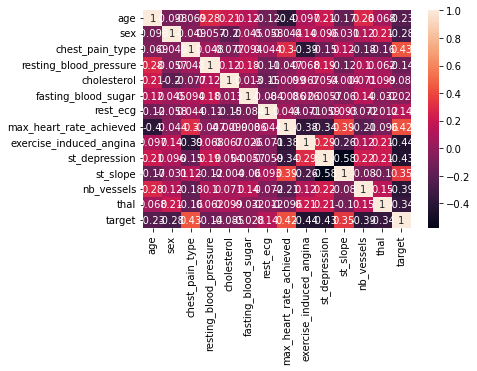

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
# generate dummies of transmission
chest_pain_type= pd.get_dummies(df['chest_pain_type'])

# add columns in the transmission into dataFrame's column
df= df.join(chest_pain_type) 
df


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target,0,1,2,3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,0


#convert target to category
df.target = df['target'].astype('category')

In [6]:
# rename columns
df=df.rename(columns= {0:'typical_angina',1:'atypical_angina',2:'non_anginal',3:'asymptomatic'})
#drop chest_pain_type 
df.drop(['chest_pain_type'],axis=1,inplace=True)
df

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target,typical_angina,atypical_angina,non_anginal,asymptomatic
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,0
299,45,1,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,0
301,57,1,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,0


In [7]:
##check data type
df.dtypes

age                          int64
sex                          int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
nb_vessels                   int64
thal                         int64
target                       int64
typical_angina               uint8
atypical_angina              uint8
non_anginal                  uint8
asymptomatic                 uint8
dtype: object

### Check correlation for each columns

In [8]:
df.corr()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target,typical_angina,atypical_angina,non_anginal,asymptomatic
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.138253,-0.147399,-0.059432,0.047516
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,0.089621,-0.041249,-0.116588,0.088043
resting_blood_pressure,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.021447,-0.081851,-0.045107,0.151343
cholesterol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.070684,-0.012750,-0.037918,-0.050589
fasting_blood_sugar,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.060190,-0.060649,0.083679,0.055511
rest_ecg,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.094591,0.077859,0.084196,-0.074654
max_heart_rate_achieved,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.376561,0.248317,0.165475,0.079082
exercise_induced_angina,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.469061,-0.233863,-0.271028,-0.093384
st_depression,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.280243,-0.277513,-0.132444,0.086959
st_slope,-0.168814,-0.030711,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877,-0.216056,0.202807,0.109769,-0.064509


In [9]:
#export data
df.to_csv('EZdata.csv',index=0)

### check how many male and femal have heart disease

In [10]:
#df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')
#df

<AxesSubplot:xlabel='target', ylabel='count'>

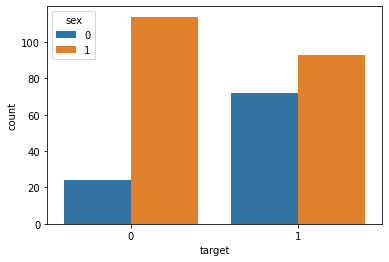

In [11]:
sns.countplot(x=df['target'],data=df,hue='sex')

In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
sex = df.groupby('sex')
list(sex)

[(0,
       age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
  2     41    0                     130          204                    0   
  4     57    0                     120          354                    0   
  6     56    0                     140          294                    0   
  11    48    0                     130          275                    0   
  14    58    0                     150          283                    1   
  ..   ...  ...                     ...          ...                  ...   
  289   55    0                     128          205                    0   
  292   58    0                     170          225                    1   
  296   63    0                     124          197                    0   
  298   57    0                     140          241                    0   
  302   57    0                     130          236                    0   
  
       rest_ecg  max_heart_rate_achieved  exercise_induced_angina  \

In [58]:
groupby_sex = (df.groupby('sex')['target']
           .value_counts(sort=False)
           .reset_index(name='Sex_Count')
              )
print(groupby_sex)



   sex  target  Sex_Count
0    0       0         24
1    0       1         72
2    1       0        114
3    1       1         93


<ipython-input-58-ef06d3876b69>:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  lis=[groupby_sex.iloc[0,2]/len(df[df.sex=='0']),
<ipython-input-58-ef06d3876b69>:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  groupby_sex.iloc[1,2]/len(df[df.sex=='0']),
<ipython-input-58-ef06d3876b69>:9: RuntimeWarning: divide by zero encountered in longlong_scalars
  groupby_sex.iloc[2,2]/len(df[df.sex=='1']),
<ipython-input-58-ef06d3876b69>:10: RuntimeWarning: divide by zero encountered in longlong_scalars
  groupby_sex.iloc[3,2]/len(df[df.sex=='1'])]


lis=[groupby_sex.iloc[0,2]/len(df[df.sex=='0']),
    groupby_sex.iloc[1,2]/len(df[df.sex=='0']),
    groupby_sex.iloc[2,2]/len(df[df.sex=='1']),
    groupby_sex.iloc[3,2]/len(df[df.sex=='1'])]
groupby_sex["Percentage"]=lis

print(groupby_sex)

### check how many people have heart disease

In [18]:
counts = df['target'].value_counts()
counts

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

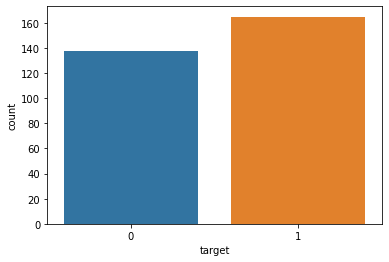

In [19]:
sns.countplot(x='target',data=df)

### check how many people have fasting_blood_sugar over 120. 
### fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
### '>126' mg/dL signals diabetes 

<AxesSubplot:xlabel='fasting_blood_sugar', ylabel='count'>

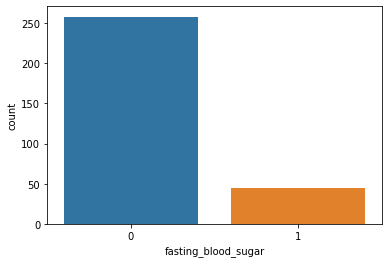

In [20]:
sns.countplot(x='fasting_blood_sugar',data=df)

### Check the max_heart_rate_achieved

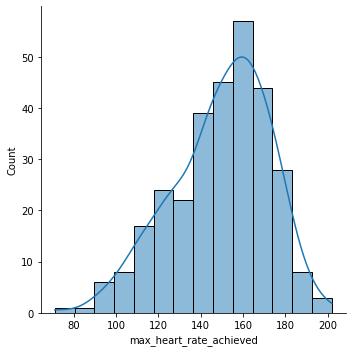

In [21]:
sns.displot(df['max_heart_rate_achieved'],kde=True)

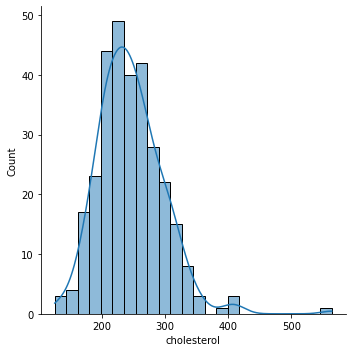

In [22]:
sns.displot(df['cholesterol'],kde=True)

### Check the association of max_heart_rate_achieved and age

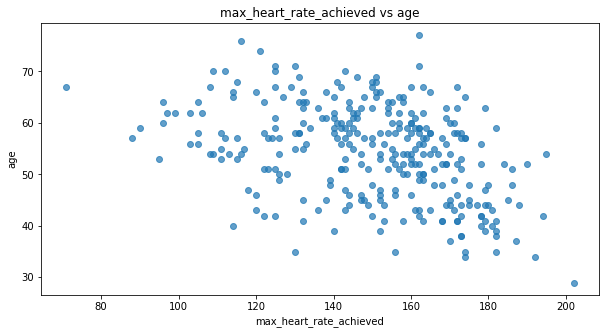

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df.max_heart_rate_achieved,df.age,alpha=0.7)
plt.title('max_heart_rate_achieved vs age')  
plt.ylabel('age')  
plt.xlabel('max_heart_rate_achieved')  
plt.show()

### check cholesterol and fasting blood sugar

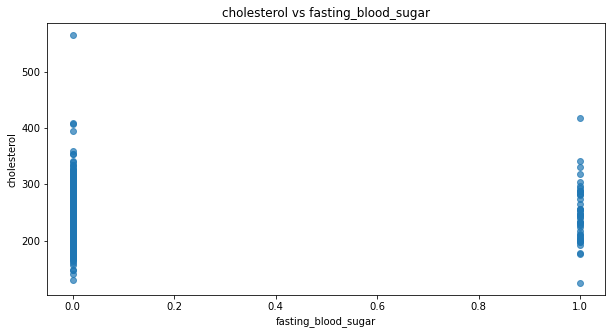

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(df.fasting_blood_sugar,df.cholesterol,alpha = 0.7)
plt.title('cholesterol vs fasting_blood_sugar')  
plt.ylabel('cholesterol')  
plt.xlabel('fasting_blood_sugar')  
plt.show()

### check the association of max_heart_rate_achieved and heart disease

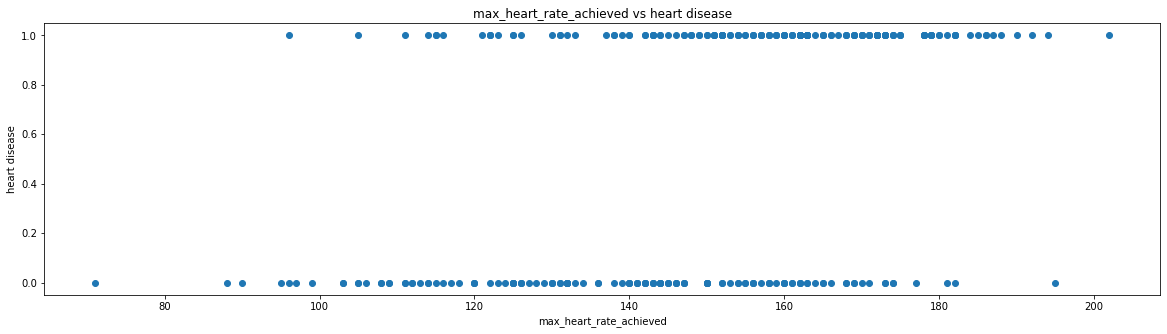

In [25]:
plt.figure(figsize=(20,5))
plt.scatter(df.max_heart_rate_achieved,df.target)
plt.title('max_heart_rate_achieved vs heart disease')  
plt.ylabel('heart disease')  
plt.xlabel('max_heart_rate_achieved')  
plt.show()

### check the association of st_depression and heart disease

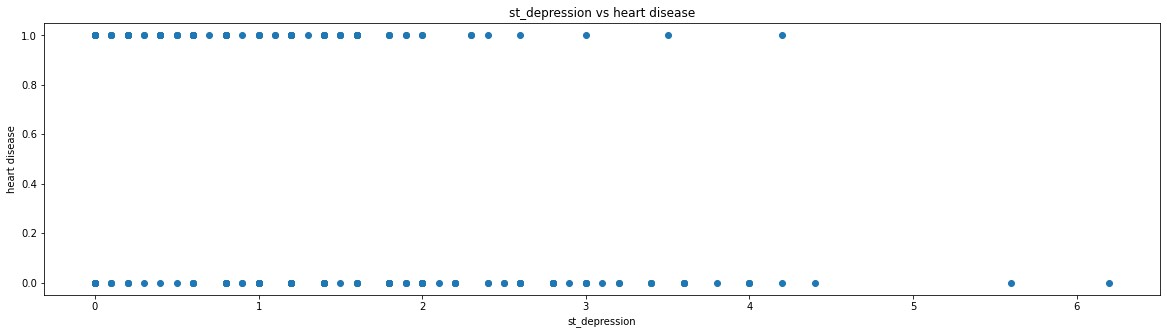

In [26]:
plt.figure(figsize=(20, 5))
plt.scatter(df.st_depression,df.target)
plt.title('st_depression vs heart disease')  
plt.ylabel('heart disease')  
plt.xlabel('st_depression')  
plt.show()

### check the association of resting_blood_pressure and heart disease

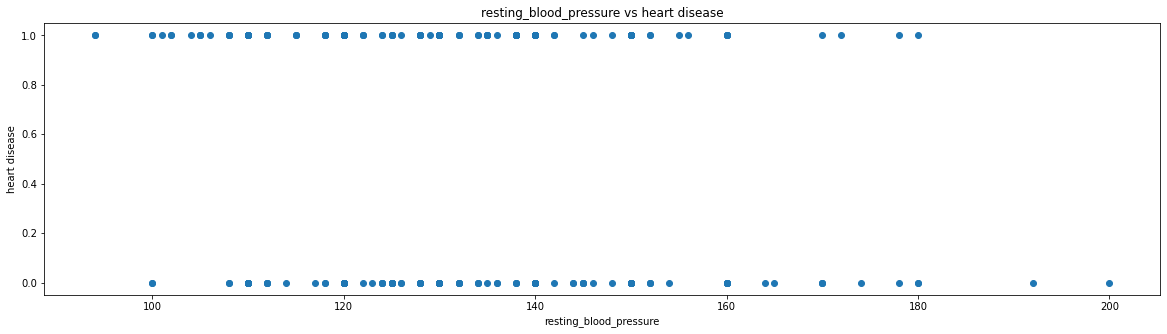

In [27]:
plt.figure(figsize=(20, 5))
plt.scatter(df.resting_blood_pressure,df.target)
plt.title('resting_blood_pressure vs heart disease')  
plt.ylabel('heart disease')  
plt.xlabel('resting_blood_pressure')  
plt.show()


### check the association of cholesterol and heart disease

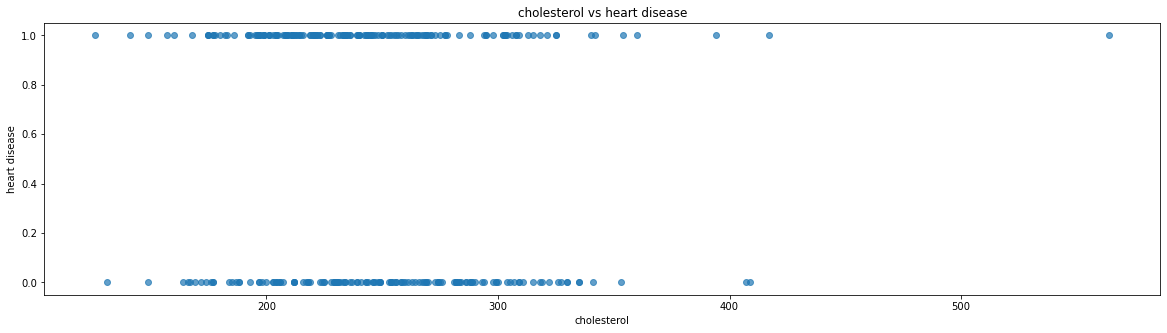

In [28]:
plt.figure(figsize=(20, 5))
plt.scatter(df.cholesterol,df.target,alpha=0.7)
plt.title('cholesterol vs heart disease')  
plt.ylabel('heart disease')  
plt.xlabel('cholesterol')  
plt.show()

### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Transform 
std=MinMaxScaler()
minmax=std.fit_transform(df) 
minmax

array([[0.70833333, 1.        , 0.48113208, ..., 0.        , 0.        ,
        1.        ],
       [0.16666667, 1.        , 0.33962264, ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.        , 0.33962264, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.8125    , 1.        , 0.47169811, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 1.        , 0.33962264, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.33962264, ..., 1.        , 0.        ,
        0.        ]])

### show after scaling

In [40]:
df_mm=pd.DataFrame(minmax,index=df.index,columns=df.columns)
df_mm.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nb_vessels,thal,target,typical_angina,atypical_angina,non_anginal,asymptomatic
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0,0.0,1.0,0.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0,1.0,0.0,0.0,0.0


thal=pd.get_dummies(df['thal'])
df= df.join(thal) 
df=df.rename(columns= {0:'higher_than_120_mg/dl',1:'lower_than_120_mg/dl'})
df.drop(['fasting_blood_sugar'],axis=1,inplace=True)
df

In [30]:
from sklearn.cluster import KMeans  

### we don't need any dependent variable for data pre-processing step as it is a clustering problem, and we have no idea about what to determine. So we tried below features


In [48]:
#chose heart_rate and  st_depression as input 
heart_rate_vs_depression = df_mm.iloc[:, [6, 8]].values  
#chose age and heart_rate as input 
age_vs_heart_rate = df_mm.iloc[:, [0, 6]].values
#chose resting blood and heart_rate as input 
resting_blood_vs_heart_rate = df_mm.iloc[:, [2, 6]].values
#chose cholesterol and st_depression as input 
cholesterol_vs_depression = df_mm.iloc[:, [3, 8]].values

C:\Users\qpe04\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


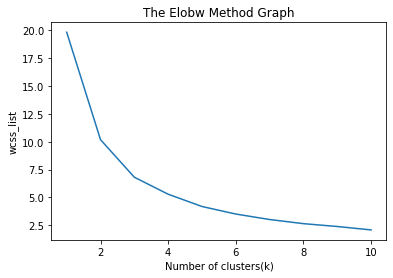

In [42]:
#use Eblow to find cluster
wcss_list= [] 

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(heart_rate_vs_depression)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [43]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
predict= kmeans.fit_predict(heart_rate_vs_depression)  

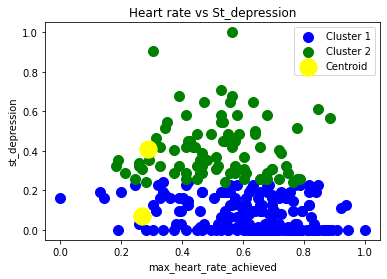

In [52]:
#visulaizing the clusters  
plt.scatter(heart_rate_vs_depression[predict == 0, 0], heart_rate_vs_depression[predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(heart_rate_vs_depression[predict == 1, 0], heart_rate_vs_depression[predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Heart rate vs St_depression')  
plt.xlabel('max_heart_rate_achieved')  
plt.ylabel('st_depression')  
plt.legend()  
plt.show()  

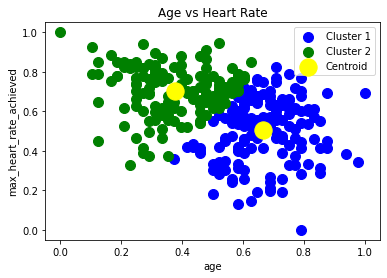

In [53]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
predict= kmeans.fit_predict(age_vs_heart_rate)

#visulaizing the clusters  
plt.scatter(age_vs_heart_rate[predict == 0, 0], age_vs_heart_rate[predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(age_vs_heart_rate[predict == 1, 0], age_vs_heart_rate[predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Age vs Heart Rate')  
plt.xlabel('age')  
plt.ylabel('max_heart_rate_achieved')  
plt.legend()  
plt.show()  

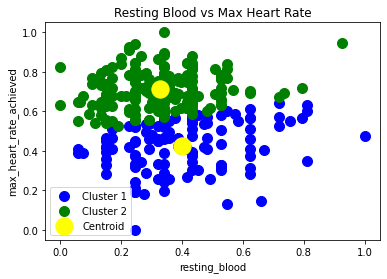

In [50]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
predict= kmeans.fit_predict(resting_blood_vs_heart_rate)

#visulaizing the clusters  
plt.scatter(resting_blood_vs_heart_rate[predict == 0, 0], resting_blood_vs_heart_rate[predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(resting_blood_vs_heart_rate[predict == 1, 0], resting_blood_vs_heart_rate[predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Resting Blood vs Max Heart Rate')  
plt.xlabel('resting_blood')  
plt.ylabel('max_heart_rate_achieved')  
plt.legend()  
plt.show()  

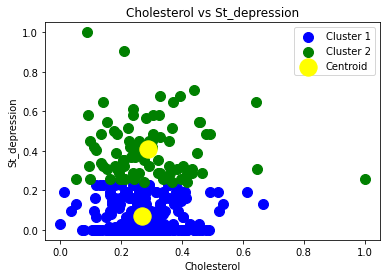

In [54]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
predict= kmeans.fit_predict(cholesterol_vs_depression)

#visulaizing the clusters  
plt.scatter(cholesterol_vs_depression[predict == 0, 0], cholesterol_vs_depression[predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(cholesterol_vs_depression[predict == 1, 0], cholesterol_vs_depression[predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Cholesterol vs St_depression')  
plt.xlabel('Cholesterol')  
plt.ylabel('St_depression')  
plt.legend()  
plt.show() 

# After trying above different features, I perfer to use Age and Heart Rate these two feature to make the cluster.